In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Probability

In [11]:
usecols = ['age','job','marital','education','default','housing','loan','contact','y']
df = pd.read_csv("/Users/saprativasarkar/Desktop/ML/10_Python_and_OOPS/11_statistics/dataset/bank-additional-full.csv",sep=';', decimal ='.', header =0,usecols=usecols)
df.head()

,age,job,marital,education,default,housing,loan,contact,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,no
1,57,services,married,high.school,unknown,no,no,telephone,no
2,37,services,married,high.school,no,yes,no,telephone,no
3,40,admin.,married,basic.6y,no,no,no,telephone,no
4,56,services,married,high.school,no,no,yes,telephone,no


##### Single Event --> Marginal Probability

In [18]:
# What is the Probability that the Customer has no Credit Card ?  
s = df.shape[0]
e = len(df[df['y']=='no'])
res = round(e/s,3)
print("Total Customer : ",s)
print("Customer having no credit card : ",e)
print("Prob of customer having no credit card : ",res)

Total Customer :  41188
Customer having no credit card :  36548
Prob of customer having no credit card :  0.887


In [22]:
# What is the Probability that the Customer is illiterate ?
s = df.shape[0]
e = len(df[df['education']=='illiterate'])
res = round(e/s,5)
print("Total Customer : ",s)
print("Total illetarate customer : ",e)
print("Prob of customer illterate : ",res)

Total Customer :  41188
Total illetarate customer :  18
Prob of customer illterate :  0.00044


In [23]:
# What is the Probability that the Customer has a Telephone ?
E = len(df[df['contact']=='telephone'])
print(f"probability that a customer having a telephone is {E/s}")

probability that a customer having a telephone is 0.3652520151500437


##### Multiple Event --> Joint Probability

In [24]:
# What is the Probability that the Customer is Single and has a Credit Card ?
pd.crosstab(df['marital'],df['y'])

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [26]:
print("Single and has a credit card",1620/s)

Single and has a credit card 0.03933184422647373


In [27]:
# What is the Probability that the Customer is Married and has at most 6 Year of Education ?
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [28]:
pd.crosstab(df['marital'],df['education'])

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
marital,,,,,,,,
divorced,489,182,565,1193,2,657,1337,187
married,3228,1767,4156,5158,15,3156,6394,1054
single,453,337,1316,3150,1,1424,4406,481
unknown,6,6,8,14,0,6,31,9


In [32]:
print("Prob of married and at most 6yrs education : ",(3228+1767+15)/s)

Prob of married and at most 6yrs education :  0.12163737010779839


## Bayes Theorem

In [35]:
df = pd.read_csv("/Users/saprativasarkar/Desktop/ML/10_Python_and_OOPS/11_statistics/dataset/KERALA_FLOOD.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [37]:
df.shape

(118, 16)

##### What is probability of having a rainfall more than 500mm in month of June, provided it has flooded in that year ?

In [58]:
# P(A|B) = (P(B|A)*P(A))/(P(A)*P(B|A)+P(A^c)*P(B|A^c))
# B=flood
# A=rain more than 500 mm
# P(A) = 0.7881
# P(B) = 0.5084
# P(B|A) = P(A INTERSECTION B)/P(A)
# P(A INTERSECTION B) = 0.4576
# P(B|A) = 0.5806
# P(A^c) = 0.2118
# P(B|A^c) = 0.24

In [47]:
df_new = df.copy()
df_new['jun>500']=0
df_new.loc[df_new['JUN']>500,'jun>500']=1
df_new.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS,jun>500
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES,0
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO,1


In [50]:
pd.crosstab(df_new['FLOODS'],df_new['jun>500'],margins=True)

jun>500,0,1,All
FLOODS,,,
NO,19,39,58
YES,6,54,60
All,25,93,118


In [51]:
# Probability of rainfall more than 500mm in June
p_500j = 93/118
p_500j

0.788135593220339

In [52]:
# Probability of Flood
p_Floods = 60/118
p_Floods

0.5084745762711864

In [53]:
# prob of flood and rainfall more than 500mm in June
p_FloodsANDj500 = 54/118
p_FloodsANDj500

0.4576271186440678

In [54]:
# Probability of flood given it rained more than 500mm
p_floods_given_j500 = p_FloodsANDj500/p_500j
p_floods_given_j500

0.5806451612903226

In [55]:
# Complement of event
# Probability of rainfall less than 500mm in June
p_j500_not = 25/118
p_j500_not

0.211864406779661

In [56]:
# Probability of flood given it rained less than 500mm
p_floods_given_j500_not = 6/25
p_floods_given_j500_not

0.24

In [57]:
# What is probability of having a rainfall more than 500mm 
# in month of June, provided it has flooded in that year ?
p_j500_given_floods = (p_floods_given_j500*p_500j)/((p_500j*p_floods_given_j500)+ (p_j500_not*p_floods_given_j500_not))
p_j500_given_floods

0.8999999999999999

## Discrete Probability Distribution

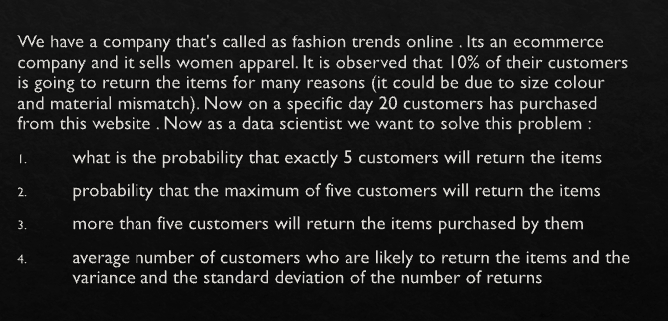

In [60]:
from scipy import stats

In [61]:
# q1
stats.binom.pmf(5,20,0.1)

0.03192136111995444

In [62]:
# q2
stats.binom.cdf(5,20,0.1)

0.988746865835491

In [63]:
# q3
1-stats.binom.cdf(5,20,0.1)

0.011253134164509015

In [65]:
# q4
mean,varience = stats.binom.stats(20,0.1)
print(mean)
print(np.sqrt(varience))

2.0
1.3416407864998738


## Normal Distribution and CDF

In [79]:
df = pd.read_csv("/Users/saprativasarkar/Desktop/ML/10_Python_and_OOPS/11_statistics/dataset/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


##### Skewness

In [81]:
df.skew(numeric_only=True)

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

In [82]:
# skewness>1 ---> positively skewed
# skewness<1 ---> negatively skewed
# (0.5,1) ---> moderately positive
# (-1,-0.5) ---> moderately negative
# (-0.5,0.5) ---> normally distributed

##### Histogram

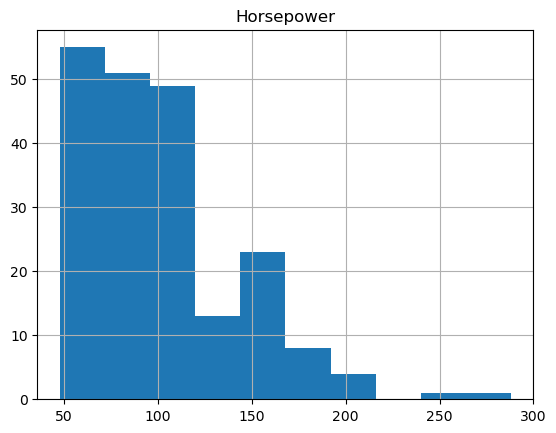

In [86]:
# positively skewed
df['horsepower'].hist()
plt.title("Horsepower")
plt.show()

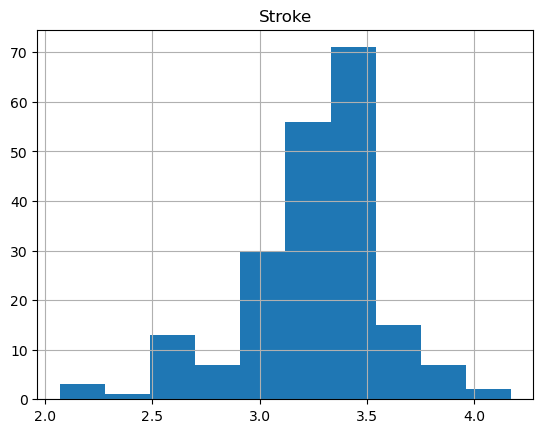

In [87]:
# moderately negative
df['stroke'].hist()
plt.title("Stroke")
plt.show()

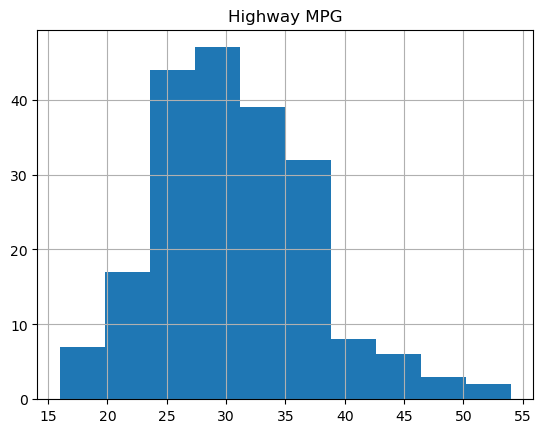

In [88]:
# normal
df["highwaympg"].hist()
plt.title("Highway MPG")
plt.show()

##### KDE Plot

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='compressionratio', ylabel='Density'>

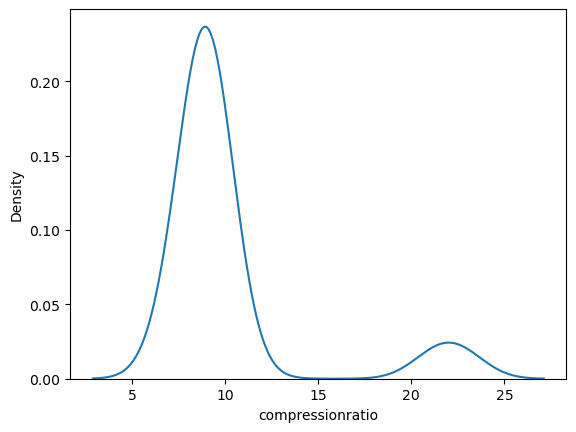

In [90]:
sns.kdeplot(df['compressionratio'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

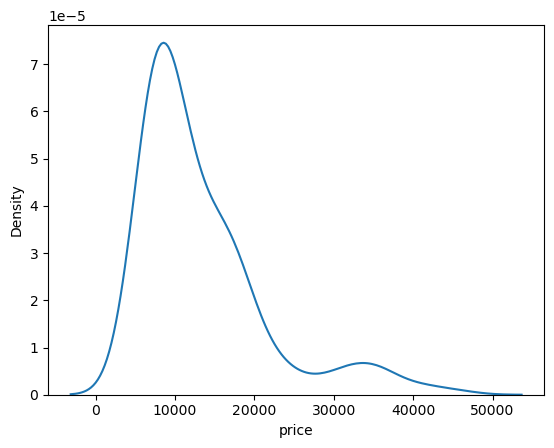

In [91]:
sns.kdeplot(df['price'])

##### Q-Q Plot

In [94]:
from scipy import stats

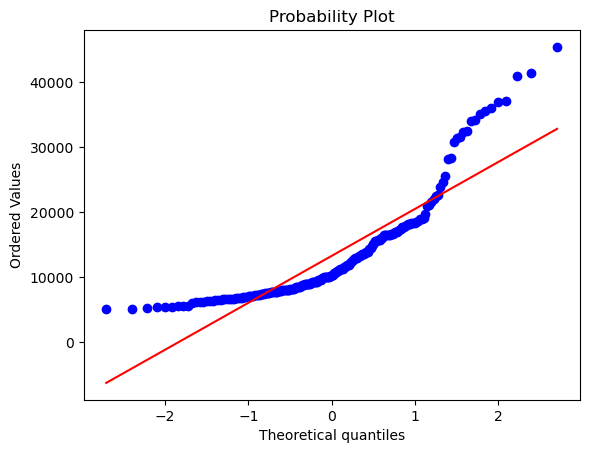

In [96]:
# positively skewed
import pylab
stats.probplot(df['price'], plot=pylab)
pylab.show()

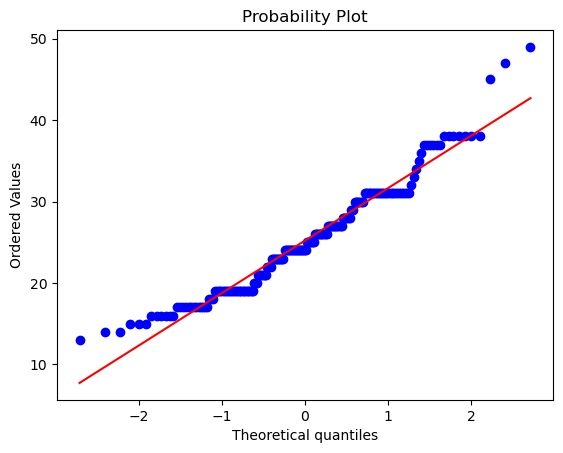

In [97]:
import pylab
stats.probplot(df['citympg'], plot=pylab)
pylab.show()

##### CDF

In [99]:
df["enginesize"].describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

In [101]:
# probability that engine size between 130 to 180
z1 = (130 - df['enginesize'].mean())/df['enginesize'].std()
z2 = (180 - df['enginesize'].mean())/df['enginesize'].std()
from scipy import stats 
p = stats.norm.cdf(z2) - stats.norm.cdf(z1)
print(f"probability that engine size is is greater than 130 and less than 180 is {p}")

probability that a  height of a student is greater than 130 and less than 180 is 0.369236855922207
